# NOTE

## Outlier lasciati
Con e senza Standardizzazione:  -> La regressione lineare è invariante rispetto a trasformazioni lineari delle feature
- MSE: 0.361
- R^2: 0.588

## Outlier: 0.75 / 0.25
Con Outlier (con e senza Standardizzazione):
- MSE: 0.557
- R^2: 0.575

## Outlier: 0.70 / 0.30
- MSE: 0.283
- R^2: 0.593

# IMPORT LIBRERIE

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# CARICAMENTO DATASET

In [38]:
data = pd.read_csv("california_housing_data.csv")
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [39]:
# Info dataset
data.info()

# Statistiche descrittive
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Ho tutti numeri (niente stringhe) non nulli -> niente pulizia

## Outlier

In [40]:
# Calcolo Q1 e Q3
Q1 = data.quantile(0.30)
Q3 = data.quantile(0.70)
IQR = Q3 - Q1

# Mantengo solo i dati senza outlier
data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

## Separazione variabili

In [41]:
# X (features/caratteristiche) -> tutte le colonne che userai per fare la predizione
# y (target) -> la colonna che vuoi predire, cioè il prezzo della casa

X = data_clean.drop(["MedHouseVal", "Population", "AveOccup"], axis=1) # caratteristiche -> prendo tutte le colonne tranne quelle indicate
y = data_clean["MedHouseVal"] # target

## Standardizza le caratteristiche utilizzando StandardScaler

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Visualizzazione della standardizzazione

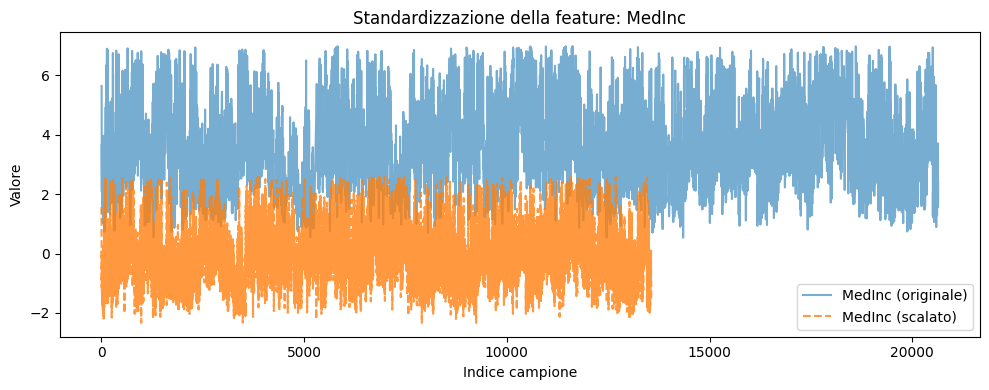

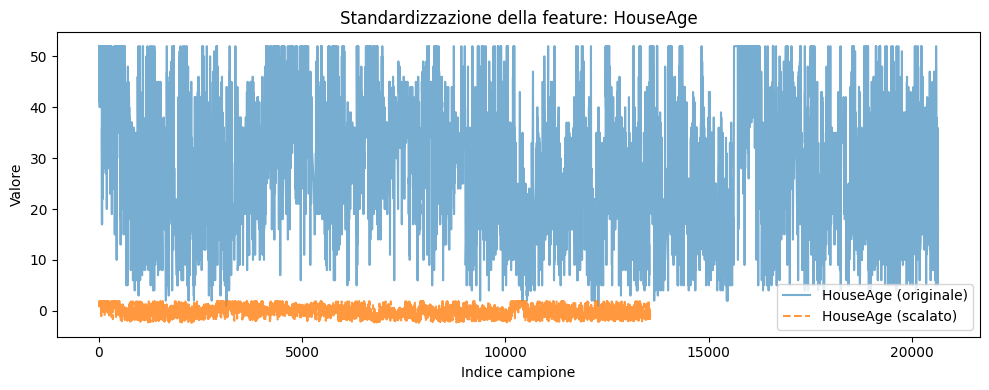

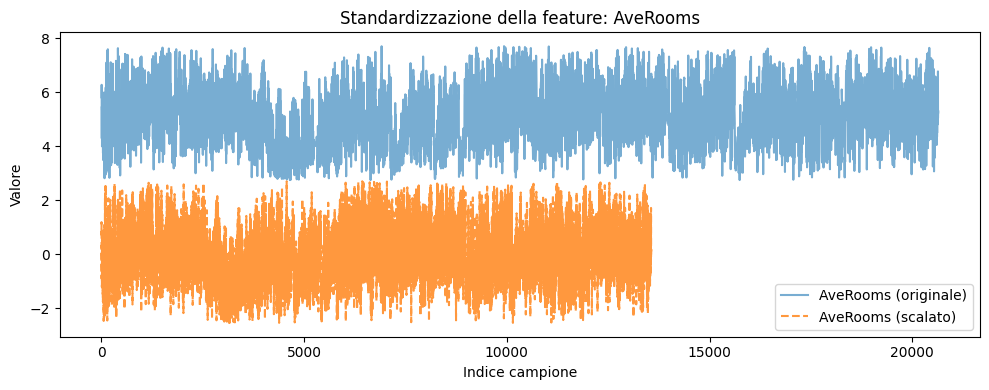

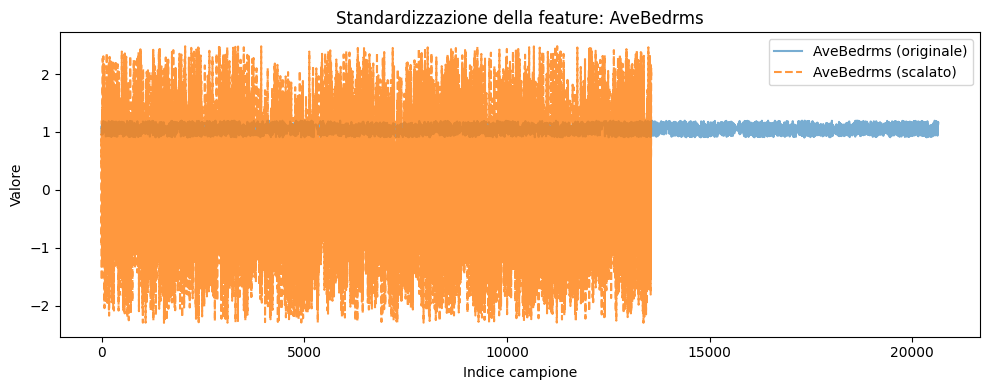

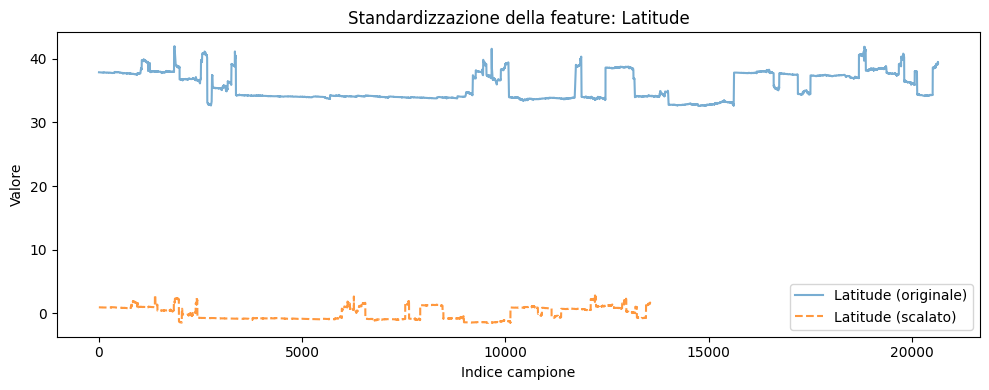

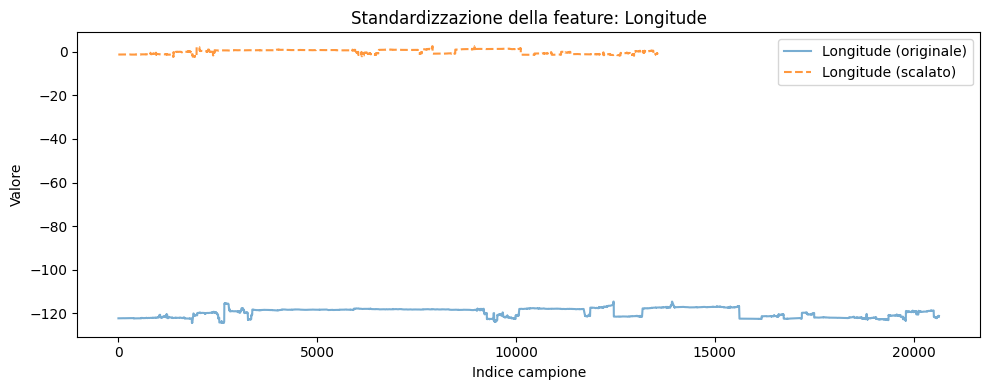

In [43]:
# Converto in DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

for col in X.columns:
    plt.figure(figsize=(10, 4))
    
    plt.plot(X.index, X[col], label=f"{col} (originale)", alpha=0.6)
    plt.plot(X_scaled_df.index, X_scaled_df[col], label=f"{col} (scalato)", linestyle='--', alpha=0.8)
    
    plt.title(f"Standardizzazione della feature: {col}")
    plt.xlabel("Indice campione")
    plt.ylabel("Valore")
    
    plt.legend()
    plt.tight_layout()
    plt.show()

# TRAINING

## Divisione train/test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Modello di regressione lineare

In [45]:
model = LinearRegression()
model.fit(X_train, y_train) # Calcola i pesi per minimizzare l’errore quadratico medio sui dati di training

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Predizione

In [46]:
y_pred = model.predict(X_test)

## Valutazione performance

- MSE (Mean Squared Error) -> più basso è meglio
- R² -> indica quanto il modello spiega la varianza dei dati (1 = perfetto, 0 = niente relazione)

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}")
print(f"R^2: {r2:.3f}")

MSE: 0.283
R^2: 0.593


### Visualizzare predizioni vs valori reali

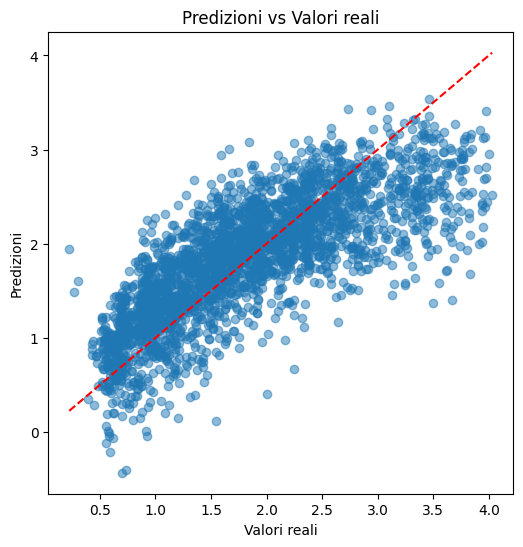

In [48]:
plt.figure(figsize=(6,6))

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linea y=x

plt.xlabel("Valori reali")
plt.ylabel("Predizioni")
plt.title("Predizioni vs Valori reali")
plt.show()